In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('kk.csv', delimiter = ";")

In [3]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


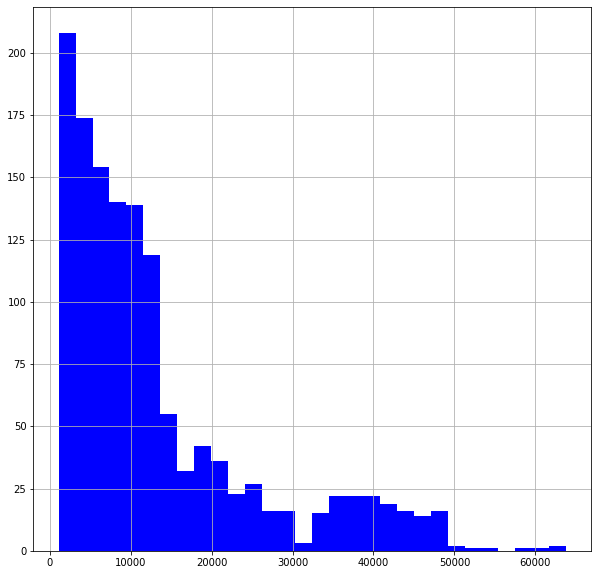

In [6]:
df['charges'].hist(bins=30, figsize=(10,10), color='blue')
plt.show()

In [7]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


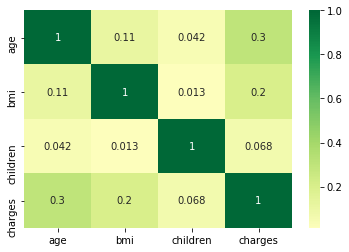

In [8]:
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

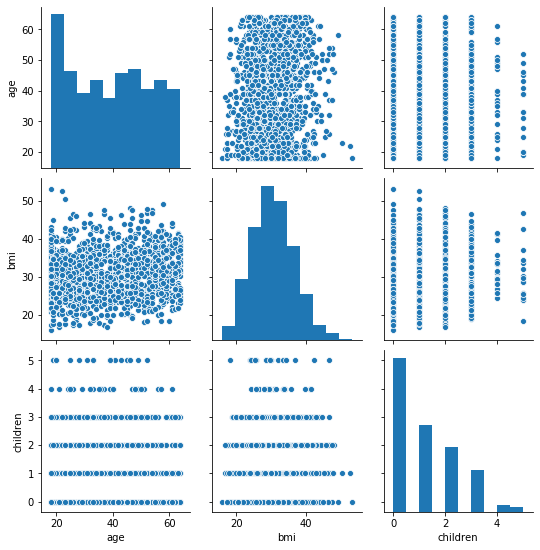

In [9]:
columns = ['age', 'sex', 'bmi', 'children', 'smoker']
sns_plot = sns.pairplot(df[columns])
# YOUR CODE

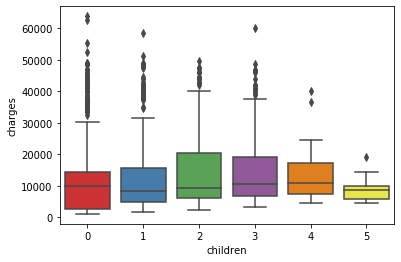

In [10]:
sns.boxplot(x=df["children"], y=df["charges"], palette='Set1')

In [11]:
q1=df.quantile(0.90)
print(q1)

age            59.0000
bmi            38.6195
children        3.0000
charges     34831.7197
Name: 0.9, dtype: float64


In [12]:
df["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

# Ввод dummy переменных

In [13]:
cleanup_nums = {"sex":     {"female": 1, "male": 2},
                "smoker": {"no": 1, "yes":2 }}

In [14]:
df = df.replace(cleanup_nums)

In [15]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.9,0,2,southwest,16884.924


In [16]:
df.sort_values('age', inplace=True)

In [17]:
df.head(20)

,age,sex,bmi,children,smoker,region,charges
1248,18,1,39.820,0,1,southeast,1633.96180
482,18,1,31.350,0,1,southeast,1622.18850
492,18,1,25.080,0,1,northeast,2196.47320
525,18,1,33.880,0,1,southeast,11482.63485
529,18,2,25.460,0,1,northeast,1708.00140
564,18,1,32.120,2,1,southeast,2801.25880
571,18,1,37.290,1,1,southeast,2219.44510
612,18,1,33.155,0,1,northeast,2207.69745
623,18,2,33.535,0,2,northeast,34617.84065
1283,18,2,30.030,1,1,southeast,1720.35370


In [18]:
df.corr()

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


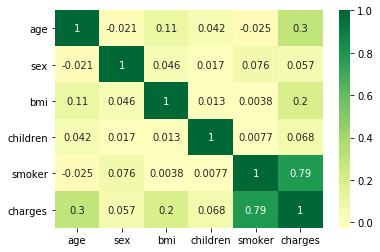

In [19]:
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [55]:
Y = df['charges']
X = df[[
    'smoker',
    'age',
    'bmi',
    'sex',
]]

In [56]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y) #Делим на обучающую и тестовую (валидационную) выборку

model = LinearRegression() #Выбрали линейную регрессию в качестве нужной модели
model.fit(X_train, Y_train) #Обучили модель

Y_train_predicted = model.predict(X_train) # Предсказали значения зависимой переменной для обучающей выборки
Y_val_predicted = model.predict(X_val)# Предсказали значения зависимой переменной для тестовой выборки
train_error = mean_squared_error(Y_train_predicted, Y_train) #Считаем ошибку для обучающей выборки
val_error = mean_squared_error(Y_val_predicted, Y_val) #Считаем ошибку на валидации

print('Ошибка на обучении:  \t', train_error)
print('Ошибка на валидации:\t', val_error)
print('Разница:\t\t', val_error - train_error)

Ошибка на обучении:  	 35921902.40029544
Ошибка на валидации:	 40533688.6920573
Разница:		 4611786.29176186


In [57]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
pred = linreg.predict(X_val)
print("R2 score: ",(r2_score(Y_val, pred)))
print("Коэффициенты независимых переменных:    ", linreg.coef_)
print("Коэффициент смещения: ", linreg.intercept_)

R2 score:  0.7030699018841522
Коэффициенты независимых переменных:     [23839.2960214    268.84682921   351.64643087   164.76340254]
Коэффициент смещения:  -37054.79743401753


In [23]:
import statsmodels.formula.api as smf


In [60]:
reg_trial= smf.ols ("charges ~  smoker + age ", df).fit ()
reg_trial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1728.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:21:21   Log-Likelihood:                -13623.
No. Observations:                1338   AIC:                         2.725e+04
Df Residuals:                    1335   BIC:                         2.727e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.625e+04    744.695    -35.245      0.000   -2.77e+04   -2.48e+04
smoker      2.386e+04    433.488     55.031      0.000     2.3e+04    2.47e+04
age          274.8712     12.455     22.069      0.000     250.437     299.305
==============================================================================
Omnibus:                      265.239   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              636.675
Skew:                           1.074   Prob(JB):                    5.59e-139
Kurtosis:                       5.609   Cond. No.                         195.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
reg = smf.ols ("charges ~  smoker + age + bmi + sex", df).fit ()
reg.summary ()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     986.5
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:16:20   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1333   BIC:                         2.715e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.536e+04   1147.108    -30.824      0.000   -3.76e+04   -3.31e+04
smoker      2.383e+04    414.186     57.544      0.000     2.3e+04    2.46e+04
age          259.4532     11.942     21.727      0.000     236.027     282.880
bmi          323.0511     27.529     11.735      0.000     269.046     377.056
sex         -109.0411    334.665     -0.326      0.745    -765.568     547.486
==============================================================================
Omnibus:                      299.394   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              708.639
Skew:                           1.212   Prob(JB):                    1.32e-154
Kurtosis:                       5.614   Cond. No.                         360.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
reg.ssr

49509276602.57248

# Тест Рамсея:

In [69]:
import statsmodels.stats.outliers_influence as oi
oi.reset_ramsey (reg, degree = 3)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[145.68954718]]), p=6.563845327180761e-32, df_denom=1.33e+03, df_num=1>

# Тест Чоу

In [67]:
df2 = df.loc[0:222]
df3 = df.loc[223:1337]
res2 = smf.ols ("charges ~  smoker + bmi + age + sex ", df2).fit ()
res3 = smf.ols ("charges ~  smoker + bmi + age + sex ", df3).fit ()
print('SSR 18-22: ', res2.ssr)
print('SSR 23-65: ', res3.ssr)

SSR 18-22:  14136912506.310629
SSR 23-65:  43549302857.79167


In [70]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     218.4
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           6.72e-95
Time:                        21:10:45   Log-Likelihood:                -3706.6
No. Observations:                 365   AIC:                             7423.
Df Residuals:                     360   BIC:                             7443.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.123e+04   2957.474    -10.561      0.000   -3.71e+04   -2.54e+04
smoker      2.322e+04    810.580     28.642      0.000    2.16e+04    2.48e+04
bmi          323.1593     54.934      5.883      0.000     215.127     431.192
age          135.9803     86.515      1.572      0.117     -34.159     306.119
sex         -185.9344    664.548     -0.280      0.780   -1492.818    1120.949
==============================================================================
Omnibus:                       97.220   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.891
Skew:                           1.342   Prob(JB):                     2.94e-48
Kurtosis:                       5.681   Cond. No.                         362.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     811.5
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:11:00   Log-Likelihood:                -11800.
No. Observations:                1164   AIC:                         2.361e+04
Df Residuals:                    1159   BIC:                         2.364e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.564e+04   1265.022    -28.176      0.000   -3.81e+04   -3.32e+04
smoker      2.378e+04    449.416     52.924      0.000    2.29e+04    2.47e+04
bmi          330.2675     30.077     10.981      0.000     271.256     389.279
age          259.6619     14.618     17.764      0.000     230.982     288.342
sex          -70.5758    361.231     -0.195      0.845    -779.316     638.164
==============================================================================
Omnibus:                      279.475   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              695.688
Skew:                           1.270   Prob(JB):                    8.57e-152
Kurtosis:                       5.810   Cond. No.                         363.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
numerator = (reg.ssr - (res2.ssr + res3.ssr)) / 4
denominator = (res2.ssr + res3.ssr) / (1338-2*4)
chow_test = numerator / denominator
print("Chow test statistic: ", chow_test, "; Critical value, 99.9%: ", 7.7)

Chow test statistic:  -47.131400821635026 ; Critical value, 99.9%:  7.7


# Тест на гетероскедастичность

In [64]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
 
# Get the test result
test_result = sms.het_breuschpagan(reg.resid, reg.model.exog)
 
lzip(names, test_result)

[('Lagrange multiplier statistic', 113.48254835488156),
 ('p-value', 1.3154189432490266e-23),
 ('f-value', 30.884050846687714),
 ('f p-value', 1.2751096024426447e-24)]

# Ввод в модель interaction-переменной

In [37]:
interaction_v=df['bmi']*df['smoker']
print(interaction_v)

1248    39.820
482     31.350
492     25.080
525     33.880
529     25.460
         ...  
398     25.600
335     34.500
378     30.115
1265    47.520
635     38.190
Length: 1338, dtype: float64


In [38]:
reg4 = smf.ols ("charges ~  smoker + bmi + age + sex  + interaction_v", df).fit ()
reg4.summary ()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     1365.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:03:19   Log-Likelihood:                -13265.
No. Observations:                1338   AIC:                         2.654e+04
Df Residuals:                    1332   BIC:                         2.657e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       1.86e+04   2203.593      8.439      0.000    1.43e+04    2.29e+04
smoker        -2.019e+04   1666.491    -12.117      0.000   -2.35e+04   -1.69e+04
bmi           -1427.6394     68.602    -20.810      0.000   -1562.219   -1293.059
age             266.3723      9.612     27.713      0.000     247.516     285.228
sex            -473.4951    269.612     -1.756      0.079   -1002.406      55.415
interaction_v  1435.6081     53.242     26.964      0.000    1331.160    1540.056
==============================================================================
Omnibus:                      710.004   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4260.528
Skew:                           2.491   Prob(JB):                         0.00
Kurtosis:                      10.183   Cond. No.                     1.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""